In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
df = wb.DataReader('^SPX', data_source='stooq', start='2010-1-1', end='2023-12-31')

In [17]:
# calculation of logarithmic rates of return, average rate of return and standard deviation and drift
logarithmic_returns = np.log(1 + df['Close'].pct_change())
mu_r = logarithmic_returns.mean()
std_r = logarithmic_returns.std()
drift = mu_r - 0.5*(std_r**2)
wyniki = []

<ipython-input-47-539ace9f5fbb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  list_prices = [df['Close'][0]]


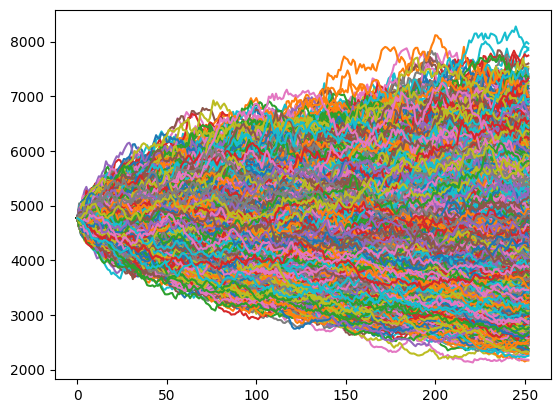

In [47]:
# function that generates 20.000 rates of return consecutive trading days according to Monte Carlo simulation
for i in range(20000):
  d_returns = np.exp(drift + std_r * norm.ppf(np.random.rand(252)))
  list_prices = [df['Close'][0]]

  # function that calculates the new price after taking into account the generated rate of return from the simulation
  for x in d_returns:
    list_prices.append(list_prices[-1]*x)
  plt.plot(list_prices)
  wyniki.append(list_prices)
  lista=[]

  for z in results:
    lista.append(z[-1])

<ipython-input-62-e356ae9e4756>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  list_prices = [df['Close'][0]]


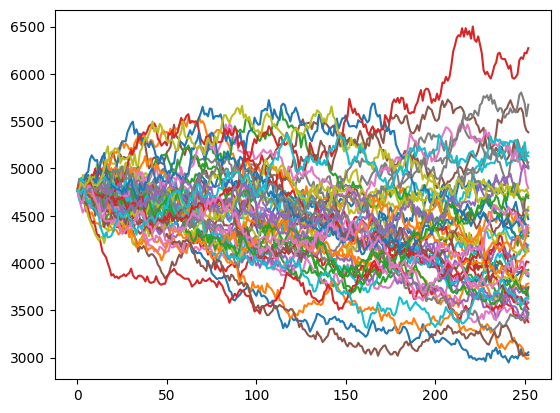

In [62]:
# function that generates 20.000 rates of return consecutive trading days according to Monte Carlo simulation
for i in range(50):
  d_returns = np.exp(drift + std_r * norm.ppf(np.random.rand(252)))
  list_prices = [df['Close'][0]]

  # function that calculates the new price after taking into account the generated rate of return from the simulation
  for x in d_returns:
    list_prices.append(list_prices[-1]*x)
  plt.plot(list_prices)
  wyniki.append(list_prices)
  lista=[]
  results=[]
  for z in results:
    lista.append(z[-1])

<ipython-input-56-10cac7433653>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(df['Close'][0],color='r', linestyle='solid',linewidth=2)


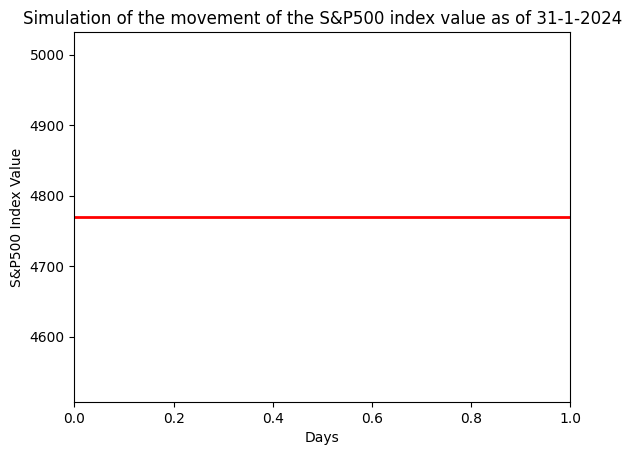

In [56]:
plt.axhline(df['Close'][0],color='r', linestyle='solid',linewidth=2)
plt.xlabel('Days')
plt.ylabel('S&P500 Index Value')
plt.title('Simulation of the movement of the S&P500 index value as of 31-1-2024')
plt.show()

In [48]:
m_pri = np.mean(lista)
dev_one = np.std(lista)
dev_two = dev_one*2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<ipython-input-53-9ae3b123458b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvline(df['Close'][0],color='r',linestyle='dashed',linewidth=2)


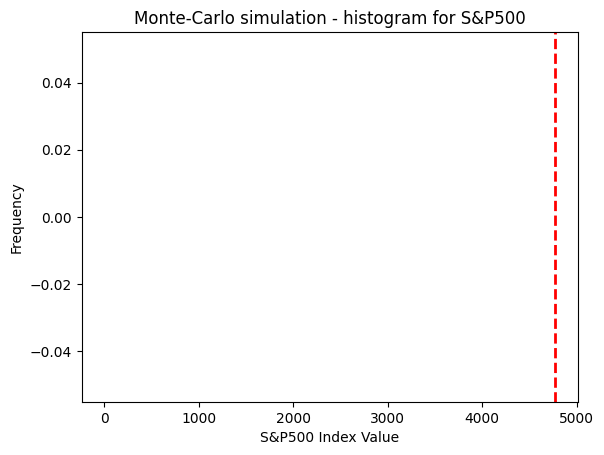

In [53]:
plt.hist(lista,bins=20)
plt.axvline(m_pri+dev_one,color='b',linestyle='dashed',linewidth=2)
plt.axvline(m_pri-dev_one,color='b',linestyle='dashed',linewidth=2)
plt.axvline(np.mean(lista),color='g',linestyle='dashed',linewidth=2)
plt.axvline(df['Close'][0],color='r',linestyle='dashed',linewidth=2)
plt.xlabel('S&P500 Index Value')
plt.ylabel('Frequency')
plt.title('Monte-Carlo simulation - histogram for S&P500')
plt.show()

Forecast for 31-1-2024
Mu_r:  -0.0004082506415707363
Drift:  -0.00046949880674756415
Actual price (red):  4769.83
Expected price (green):  nan
Std dev +:  nan
Std dev -:  nan


<ipython-input-66-0c074292787a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Actual price (red): ', str(df['Close'][0]))


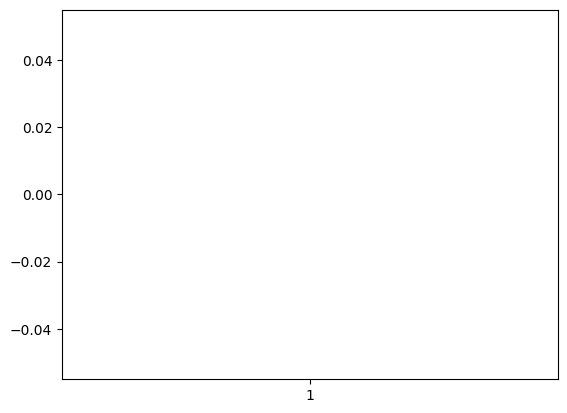

In [66]:
# box plot of simulation’s results
plt.boxplot(lista, showmeans=True)

# function that generates simulation results in text form, date changed according to the simulation day being analyzed
print('Forecast for 31-1-2024')
print('Mu_r: ', str(mu_r))
print('Drift: ', str(drift))
print('Actual price (red): ', str(df['Close'][0]))
print('Expected price (green): ', str(m_pri))
print('Std dev +: ', str(m_pri + dev_one))
print('Std dev -: ', str(m_pri - dev_one))
plt.show()